In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# to split and standarise the datasets
from sklearn.model_selection import train_test_split

In [2]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv("/content/drive/MyDrive/Feature Engineering/Datasets/titanic.csv", usecols=["age", "fare", "survived"])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.survived,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [5]:
# let's impute Age by random sampling both in
# train and test sets

# create the new variable where NA will be imputed:
# make a copy from the original variable, with NA
X_train["Age_imputed"] = X_train["age"].copy()
X_test["Age_imputed"] = X_test["age"].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = (
    X_train["age"].dropna().sample(X_train["age"].isnull().sum(), random_state=0)
)

random_sample_test = (
    X_train["age"].dropna().sample(X_test["age"].isnull().sum(), random_state=0)
)

# what is all of the above code doing?

# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['Age'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train["age"].isnull()].index
random_sample_test.index = X_test[X_test["age"].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train["age"].isnull(), "Age_imputed"] = random_sample_train
X_test.loc[X_test["age"].isnull(), "Age_imputed"] = random_sample_test

In [6]:
# check that NA were imputed
X_train["Age_imputed"].isnull().sum()

0

In [7]:
# check that NA were imputed
X_test["Age_imputed"].isnull().sum()

0

In [8]:
X_train.head(15)

,survived,age,fare,Age_imputed
501,1,13.0,19.5000,13.0
588,1,4.0,23.0000,4.0
402,1,30.0,13.8583,30.0
1193,0,NaN,7.7250,40.5
686,1,22.0,7.7250,22.0
971,0,NaN,7.8792,39.0
117,1,30.0,56.9292,30.0
540,1,2.0,26.0000,2.0
294,0,49.0,110.8833,49.0
261,1,35.0,26.2875,35.0


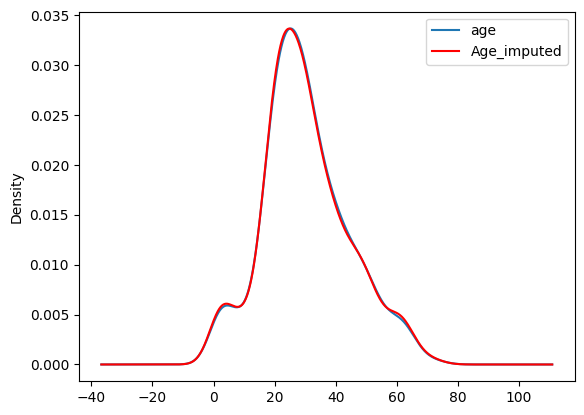

In [9]:
# we can see that the distribution of the variable after
# random sample imputation is almost exactly the same as the original

fig = plt.figure()
ax = fig.add_subplot(111)

X_train["age"].plot(kind="kde", ax=ax)
X_train["Age_imputed"].plot(kind="kde", ax=ax, color="red")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

In [10]:
# there is some change in the variance of the variable.
# however this change is much smaller compared to mean or median
# imputation (check the previous notebook for comparison)

print("Original variable variance: ", X_train["age"].var())
print("Variance after random imputation: ", X_train["Age_imputed"].var())

Original variable variance:  194.16304666581863
Variance after random imputation:  198.53703762759557


In [11]:
# the covariance of Age with Fare is also less affected by this
# imputation technique compared to mean or median imputation

X_train[["fare", "age", "Age_imputed"]].cov()

,fare,age,Age_imputed
fare,2248.326729,136.176223,100.938070
age,136.176223,194.163047,194.163047
Age_imputed,100.938070,194.163047,198.537038


<Axes: >

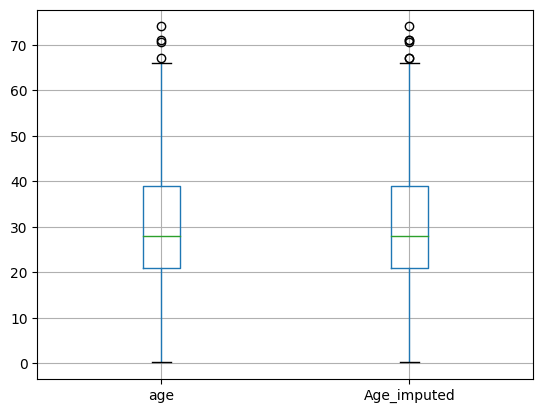

In [12]:
# Finally, the outliers are also less affected by this imputation
# technique

# Let's find out using a boxplot
X_train[["age", "Age_imputed"]].boxplot()

In [13]:
# let's pick one observation with NA in Age
# in this case we pick observation indexed 15

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
15,0,NaN,25.925


In [14]:
# and now let's fill that NA with a random value
# extracted from the same variable where observations are available

# extract a random value, just 1
sampled_value = X_train["age"].dropna().sample(1)

# re index to 15
sampled_value.index = [15]  # pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation["Age_random"] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,2.0


In [15]:
# let's repeat the exercise again:
# we fill the NA with another random extracted value

# extract a random value, just 1
sampled_value = X_train["age"].dropna().sample(1)

# re index to 15
sampled_value.index = [15]  # pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation["Age_random"] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,46.0


In [16]:
# and again
# we fill the NA with another random extracted value

# extract a random value, just 1
sampled_value = X_train["age"].dropna().sample(1)

# re index to 15
sampled_value.index = [15]  # pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation["Age_random"] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,6.0


Text(0, 0.5, 'Number of times')

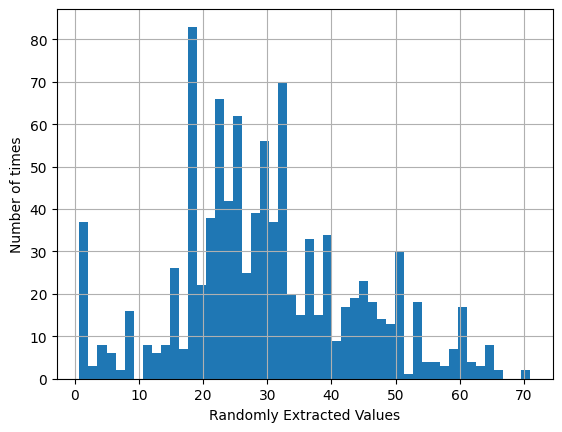

In [17]:
# if we repeat the process 1000 times:

values_ls = []

# capture the non-Na values to speed
# the computation
tmp = X_train.age.dropna()

for i in range(1000):

    # extract a random value, just 1
    sampled_value = tmp.sample(1).values

    # add the extracted value to the list
    values_ls.append(float(sampled_value[0]))

pd.Series(values_ls).hist(bins=50)
plt.xlabel("Randomly Extracted Values")
plt.ylabel("Number of times")

In [18]:
values_ls = []

for i in range(100):

    # extract a random value, just 1, now with seed
    sampled_value = X_train.age.dropna().sample(1, random_state=10)

    # add random value to the list
    values_ls.append(float(sampled_value.iloc[0]))

# print the values
pd.Series(values_ls).unique()

array([23.5])

In [19]:
values_ls

[23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5]

In [20]:
# let's pick one observation with NA in Age
# in this case we pick observation indexed 15

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
15,0,NaN,25.925


In [21]:
# the seed is now the Fare

int(observation.fare.iloc[0])

25

In [22]:
# we assign the Fare as the seed in the random sample extraction
sampled_value = X_train.age.dropna().sample(1, random_state=int(observation.fare.iloc[0]))

sampled_value.index = [15]

observation["Age_random"] = sampled_value
observation

,survived,age,fare,Age_random
15,0,NaN,25.925,44.0


In [23]:
# for a different observation with a different Fare,
# we would get a different randomly extracted value

observation = data[data.age.isnull()].tail(1)

observation

,survived,age,fare
1305,0,NaN,14.4542


In [24]:
# new seed
int(observation.fare.iloc[0])

14

In [25]:
# we assign the Fare as the seed in the random sample extraction
sampled_value = X_train.age.dropna().sample(1, random_state=int(observation.fare.iloc[0]))

sampled_value.index = [1305]

observation["Age_random"] = sampled_value
observation

,survived,age,fare,Age_random
1305,0,NaN,14.4542,40.0


In [26]:
# let's load the dataset with a few columns for the demonstration
cols_to_use = ["BsmtQual", "FireplaceQu", "SalePrice"]

data = pd.read_csv("/content/drive/MyDrive/Feature Engineering/Datasets/houseprice.csv", usecols=cols_to_use)

# let's inspect the percentage of missing values in each variable
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
FireplaceQu    0.472603
dtype: float64

In [27]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [28]:
# let's impute BsmtQual by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train["BsmtQual_imputed"] = X_train["BsmtQual"].copy()
X_test["BsmtQual_imputed"] = X_test["BsmtQual"].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = (
    X_train["BsmtQual"]
    .dropna()
    .sample(X_train["BsmtQual"].isnull().sum(), random_state=0)
)

random_sample_test = (
    X_train["BsmtQual"]
    .dropna()
    .sample(X_test["BsmtQual"].isnull().sum(), random_state=0)
)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['BsmtQual'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train["BsmtQual"].isnull()].index
random_sample_test.index = X_test[X_test["BsmtQual"].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train["BsmtQual"].isnull(), "BsmtQual_imputed"] = random_sample_train
X_test.loc[X_test["BsmtQual"].isnull(), "BsmtQual_imputed"] = random_sample_test

In [29]:
# let's impute FireplaceQu by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train["FireplaceQu_imputed"] = X_train["FireplaceQu"].copy()
X_test["FireplaceQu_imputed"] = X_test["FireplaceQu"].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = (
    X_train["FireplaceQu"]
    .dropna()
    .sample(X_train["FireplaceQu"].isnull().sum(), random_state=0)
)

random_sample_test = (
    X_train["FireplaceQu"]
    .dropna()
    .sample(X_test["FireplaceQu"].isnull().sum(), random_state=0)
)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['FireplaceQu'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train["FireplaceQu"].isnull()].index
random_sample_test.index = X_test[X_test["FireplaceQu"].isnull()].index

# replace the NA in the newly created variable
X_train.loc[
    X_train["FireplaceQu"].isnull(), "FireplaceQu_imputed"
] = random_sample_train
X_test.loc[X_test["FireplaceQu"].isnull(), "FireplaceQu_imputed"] = random_sample_test

In [30]:
# check that nulls were removed
X_train["FireplaceQu_imputed"].isnull().sum()

0

In [31]:
# and now let's evaluate the effect of the imputation on the distribution
# of the categories and the target within those categories

# we used a similar function in the notebook of arbitrary value imputation
# for categorical variables


def categorical_distribution(df, variable_original, variable_imputed):

    tmp = pd.concat(
        [
            # percentage of observations per category, original variable
            df[variable_original].value_counts(normalize=True),
            # percentage of observations per category, imputed variable
            df[variable_imputed].value_counts(normalize=True),
        ],
        axis=1,
    )

    # add column names
    tmp.columns = ["original", "imputed"]

    return tmp

In [32]:
# run the function in a categorical variable
categorical_distribution(X_train, "BsmtQual", "BsmtQual_imputed")

,original,imputed
TA,0.463928,0.465753
Gd,0.430862,0.428571
Ex,0.082164,0.083170
Fa,0.023046,0.022505


In [33]:
# run the function in a categorical variable
categorical_distribution(X_train, "FireplaceQu", "FireplaceQu_imputed")

,original,imputed
Gd,0.468750,0.469667
TA,0.420956,0.420744
Fa,0.047794,0.046967
Ex,0.033088,0.032290
Po,0.029412,0.030333


In [34]:
# now let's look at the distribution of the target within each
# variable category


def automate_plot(df, variable, target):

    fig = plt.figure()
    ax = fig.add_subplot(111)

    for category in df[variable].dropna().unique():
        df[df[variable] == category][target].plot(kind="kde", ax=ax)

    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].dropna().unique()
    ax.legend(lines, labels, loc="best")

    plt.show()

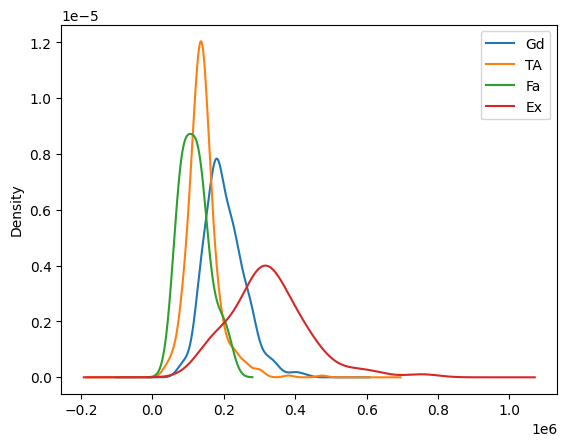

In [35]:
automate_plot(X_train, "BsmtQual", "SalePrice")

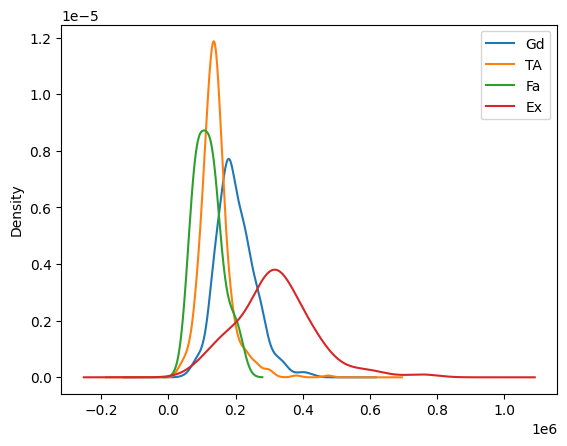

In [36]:
automate_plot(X_train, "BsmtQual_imputed", "SalePrice")

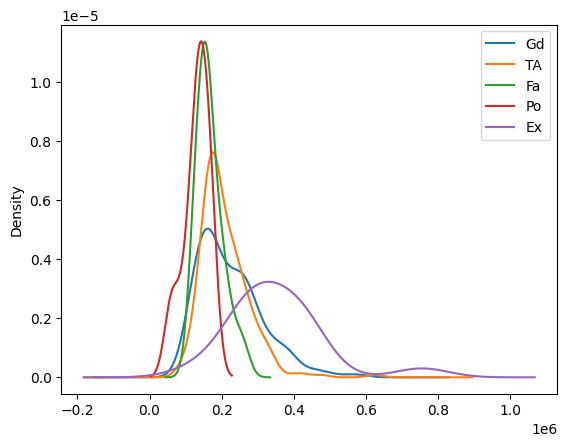

In [37]:
automate_plot(X_train, "FireplaceQu", "SalePrice")

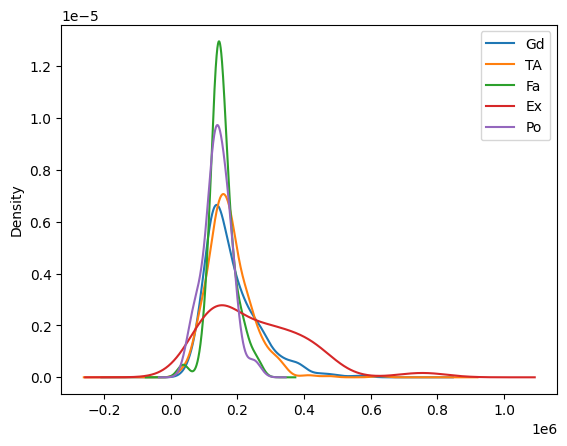

In [38]:
automate_plot(X_train, "FireplaceQu_imputed", "SalePrice")